In [3]:
from JJcalc import JJpar

In [19]:
JJpar(RN=230, sizeX=11e-6, sizeY=11e-6, metalTHK=250e-10, 
      T=20e-3, Nser=1, Npar=1, C_shunt=1e-20,
      ezread=True, EunHz=False, material = 'Nb')

RN_JJ               Rs_JJ    I_AB       EJ    LK_JJ    C_JJ        Z  \
0  230.0 ohm  28.0 n$\Omega m^2$  9.6 µA  227.7 K  34.5 pH  6.1 pF  2.4 ohm   

     EC_tot       w_p      Q EJ/EC_to  
0  153.0 µK  11.0 GHz  96.6     1.5 M

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 13 14:53:16 2019

@author: racco
"""

# -*- coding: utf-8 -*-
"""
Created on Tue Sep 04 17:45:43 2018 @author: wsLu
"""
from math import *
import scipy.constants as const
from scipy.special import ellipk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from si_prefix import si_format

roundN = 5

In [6]:
devlst = {'D079N1': JJpar(RN=  290e3/.5, sizeX = .177, sizeY = .177),
          'D079N3': JJpar(RN=  520e3/ 8, sizeX = .784, sizeY = .263),
          'D079N5': JJpar(RN=   27e3/ 8, sizeX = 2.25, sizeY = 1.74),
          'D079N6': JJpar(RN= 2.15e3/.5, sizeX = 2.21, sizeY = 1.72),
          'D079N0': JJpar(RN= 24.3e3/ 8, sizeX = 2.21, sizeY = 1.67)}

#unit  = devlst[list(devlst.keys())[0]][1]

a     = devlst[list(devlst.keys())[0]][0]
idlst = []
for dev in devlst:
    a = a.merge(devlst[dev][0], 'outer')
    idlst.append(dev)
   
a.insert(loc = 0, column = 'dev id', value = idlst)
a

dev id      RN_JJ         Rs_JJ        I_AB         EJ        C_JJQP  \
0  D079N1  72.500000  2.271353e+12    4.413245   0.105199  1.566450e+12   
1  D079N3   8.125000  1.675310e+12   39.379720   0.938697  1.030960e+13   
2  D079N5   0.421875  1.651641e+12  758.424244  18.078602  1.957500e+14   
3  D079N6   0.537500  2.043145e+12  595.274843  14.189600  1.900600e+14   
4  D079N0   0.379688  1.401313e+12  842.693605  20.087336  1.845350e+14   

             EC  $\omega_p$             Q          beta         EJ/EC  
0  5.934594e-13    0.000093  5.281743e+08  2.789681e+17  1.772636e+11  
1  9.017077e-14    0.000108  4.536100e+08  2.057620e+17  1.041021e+13  
2  4.749040e-15    0.000109  4.503942e+08  2.028549e+17  3.806790e+15  
3  4.891217e-15    0.000098  5.009387e+08  2.509396e+17  2.901037e+15  
4  5.037660e-15    0.000118  4.148609e+08  1.721096e+17  3.987433e+15

<function matplotlib.pyplot.show(*args, **kw)>

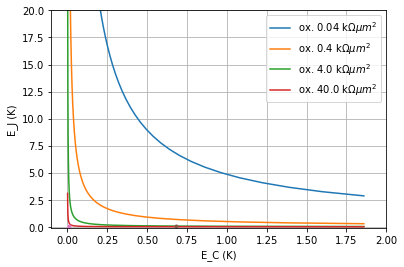

In [9]:
oxidation = [0.04E3, 0.4E3, 4E3, 40E3]
widthUM = np.linspace(0.1, 4, 500)
EJarr = np.zeros(len(widthUM))
ECarr = np.zeros(len(widthUM))

for i,rho in enumerate(oxidation):
    for j,w in enumerate(widthUM):
        EJarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[0]
        ECarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[1]
    plt.plot(ECarr, EJarr, label = r'ox. {} k$\Omega\mu m^2$'.format(rho/1E3))
    
plt.legend(loc = 1)
plt.xlabel('E_C (K)')
plt.ylabel('E_J (K)')
plt.plot([8E-3, 8E-3],[10E-3, 50E-3]) #MBL targeting state
plt.plot(0.683, 0.043, '.') #bare 200kohm junction
plt.plot(0.008, 0.043, '.') #200kohm junction with EC0 = 8mK
plt.grid()

plt.xlim(-0.1,2)
plt.ylim(-0.1,20)

plt.show


<function matplotlib.pyplot.show(*args, **kw)>

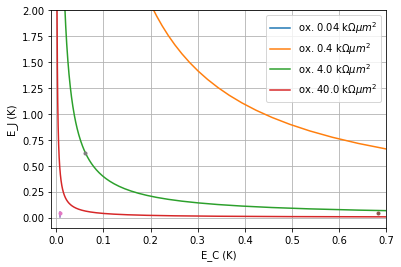

In [306]:
oxidation = [0.04E3, 0.4E3, 4E3, 40E3]
# oxidation = np.linspace(0.4E3, 4E3, 4)
widthUM = np.linspace(0.1, 4, 500)
EJarr = np.zeros(len(widthUM))
ECarr = np.zeros(len(widthUM))

for i,rho in enumerate(oxidation):
    for j,w in enumerate(widthUM):
        EJarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[0]
        ECarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[1]
    plt.plot(ECarr, EJarr, label = r'ox. {} k$\Omega\mu m^2$'.format(rho/1E3))
    
plt.legend(loc = 1)
plt.xlabel('E_C (K)')
plt.ylabel('E_J (K)')
plt.plot([8E-3, 8E-3],[10E-3, 50E-3]) #MBL targeting state
plt.plot(0.683, 0.043, '.') #bare 200kohm junction
plt.plot(0.008, 0.043, '.') #200kohm junction with EC0 = 8mK
plt.plot(0.062, 0.62, '.')
plt.grid()

plt.xlim(-0.01,0.7)
plt.ylim(-0.1,2)

plt.show


<function matplotlib.pyplot.show(*args, **kw)>

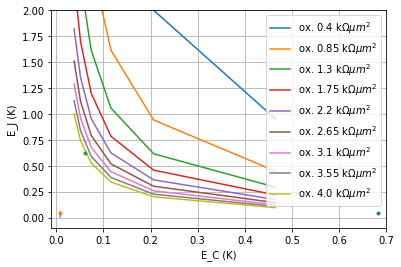

In [299]:
# oxidation = [0.04E3, 0.4E3, 4E3, 40E3]
oxidation = np.linspace(0.4E3, 4E3, 9)
widthUM = np.linspace(0.2, 0.7, 6)
EJarr = np.zeros(len(widthUM))
ECarr = np.zeros(len(widthUM))

for i,rho in enumerate(oxidation):
    for j,w in enumerate(widthUM):
        EJarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[0]
        ECarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[1]
    plt.plot(ECarr, EJarr, label = r'ox. {} k$\Omega\mu m^2$'.format(rho/1E3))
    
plt.legend(loc = 1)
plt.xlabel('E_C (K)')
plt.ylabel('E_J (K)')
plt.plot([8E-3, 8E-3],[10E-3, 50E-3]) #MBL targeting state
plt.plot(0.683, 0.043, '.') #bare 200kohm junction
plt.plot(0.008, 0.043, '.') #200kohm junction with EC0 = 8mK
plt.plot(0.062, 0.62, '.')
plt.grid()

plt.xlim(-0.01,0.7)
plt.ylim(-0.1,2)

plt.show


<function matplotlib.pyplot.show(*args, **kw)>

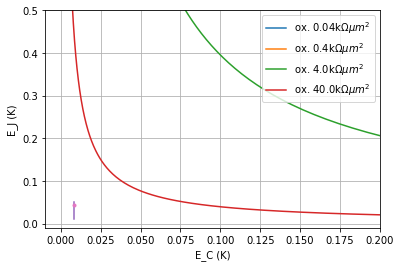

In [305]:
oxidation = [0.04E3, 0.4E3, 4E3, 40E3]
# oxidation = np.linspace(0.4E3, 4E3, 4)
widthUM = np.linspace(0.1, 4, 500)
EJarr = np.zeros(len(widthUM))
ECarr = np.zeros(len(widthUM))

for i,rho in enumerate(oxidation):
    for j,w in enumerate(widthUM):
        EJarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[0]
        ECarr[j] = EJEC(Rs_JJ=rho, JJwidthUM=w, metalTHKUM=250E-4, Tc=1.34)[1]
    plt.plot(ECarr, EJarr, label = r'ox. {}k$\Omega\mu m^2$'.format(rho/1E3))
    
plt.legend(loc = 1)
plt.xlabel('E_C (K)')
plt.ylabel('E_J (K)')
plt.plot([8E-3, 8E-3],[10E-3, 50E-3]) #MBL targeting state
plt.plot(0.683, 0.043, '.') #bare 200kohm junction
plt.plot(0.008, 0.043, '.') #200kohm junction with EC0 = 8mK
plt.grid()

plt.xlim(-0.01,0.2)
plt.ylim(-0.01,0.5)

plt.show
